In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\ML Projects\Data\diabetes\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

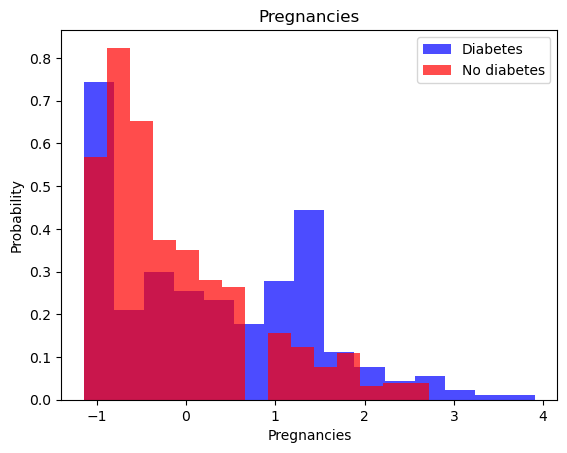

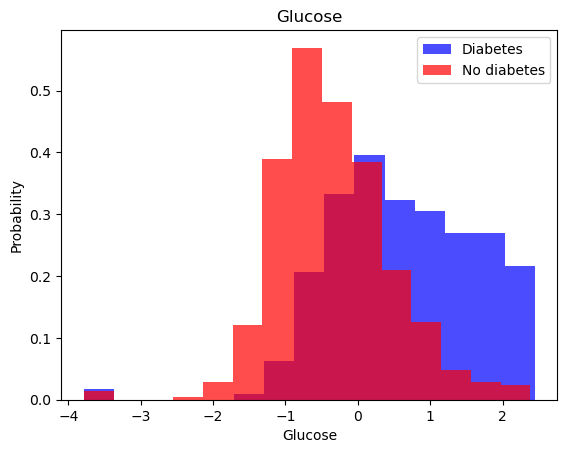

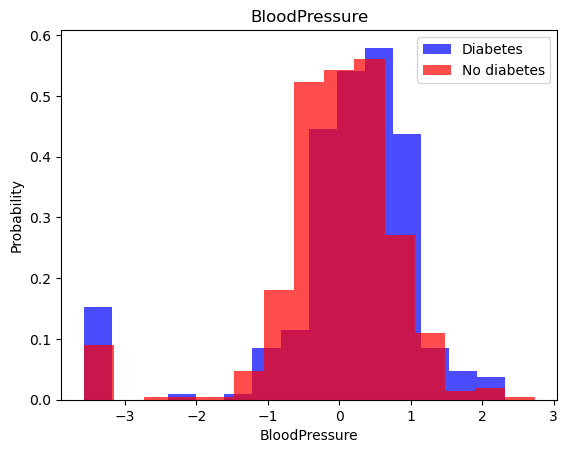

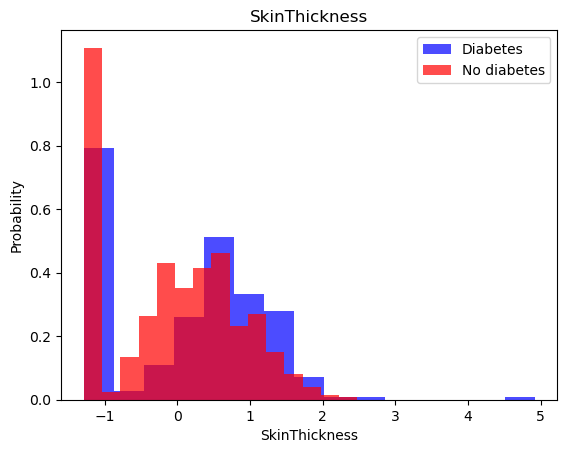

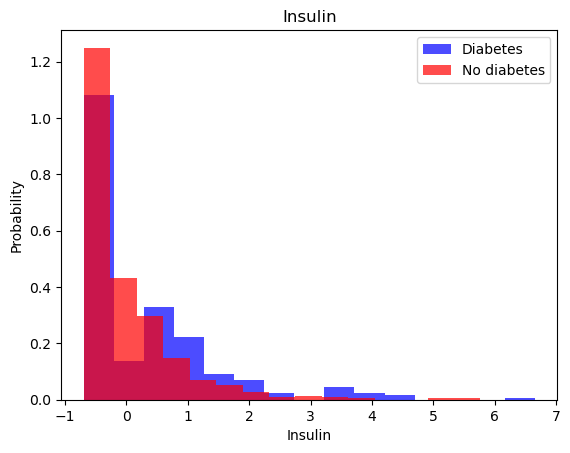

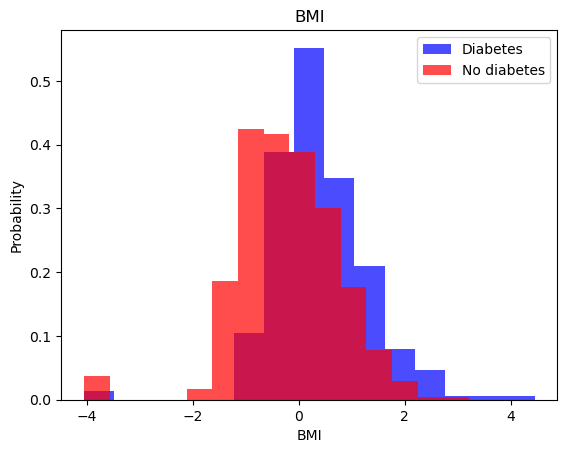

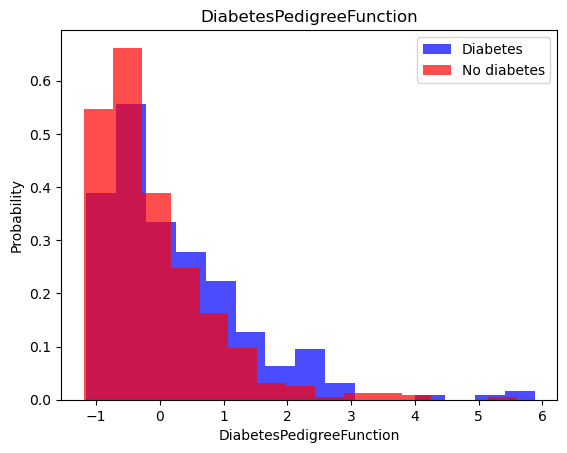

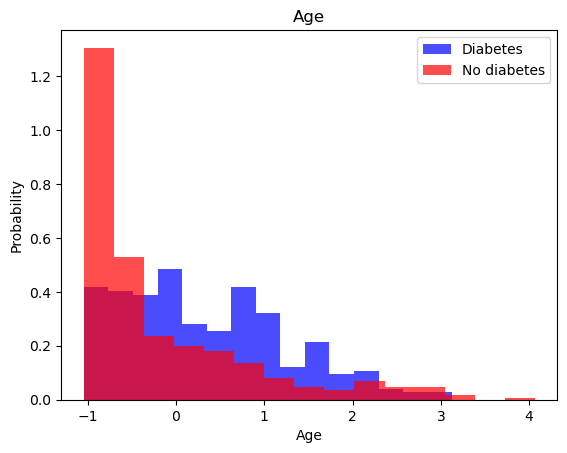

In [24]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label="No diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [7]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [10]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [14]:
X.shape, y.shape

((768, 8), (768,))

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [25]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

In [26]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [27]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [23]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [29]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [31]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 3ms/step - loss: 0.7512 - accuracy: 0.5067


[0.7511653900146484, 0.5066666603088379]

In [32]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.7939 - accuracy: 0.4600


[0.7938846349716187, 0.46000000834465027]

In [33]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 2s 10ms/step - loss: 0.7101 - accuracy: 0.5083 - val_loss: 0.6957 - val_accuracy: 0.4950
Epoch 2/20
38/38 [==============================] - 0s 7ms/step - loss: 0.6634 - accuracy: 0.5667 - val_loss: 0.6502 - val_accuracy: 0.6250
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 0.6327 - accuracy: 0.6650 - val_loss: 0.6195 - val_accuracy: 0.7050
Epoch 4/20
38/38 [==============================] - 0s 6ms/step - loss: 0.6047 - accuracy: 0.7050 - val_loss: 0.5855 - val_accuracy: 0.7550
Epoch 5/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5763 - accuracy: 0.7283 - val_loss: 0.5509 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5517 - accuracy: 0.7400 - val_loss: 0.5263 - val_accuracy: 0.7600
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 0.5329 - accuracy: 0.7433 - val_loss: 0.5035 - val_accuracy: 0.7450
Epoch 8/20
38/38 [=

In [34]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7800


[0.4650636315345764, 0.7799999713897705]